In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

from google.colab import drive
drive.mount('/content/gdrive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [ ]:
#defining FID scores
FIDs = {
    'log1':2.6929,
    'log2':1.271,
    'log3':1.745,
    'log4':3.6701,
    'log5':167.5097,
    'log6':1.7497,
    'log7':2.0212,
    'log8':0.9597,
    'log9':0.6166,
    'log10':1.4947}

fields = ['model',
          'batch size',
          'generator learning rate',
          'discriminator learning rate',
          'number of epochs',
          'dropout rate',
          'leaky RELU negative slope',
          'wasserstein nCritic',
          'final D loss',
          'final G loss',
          'average epoch time',
          'FID']

df = pd.DataFrame(np.zeros((len(FIDs), len(fields))), columns = fields)

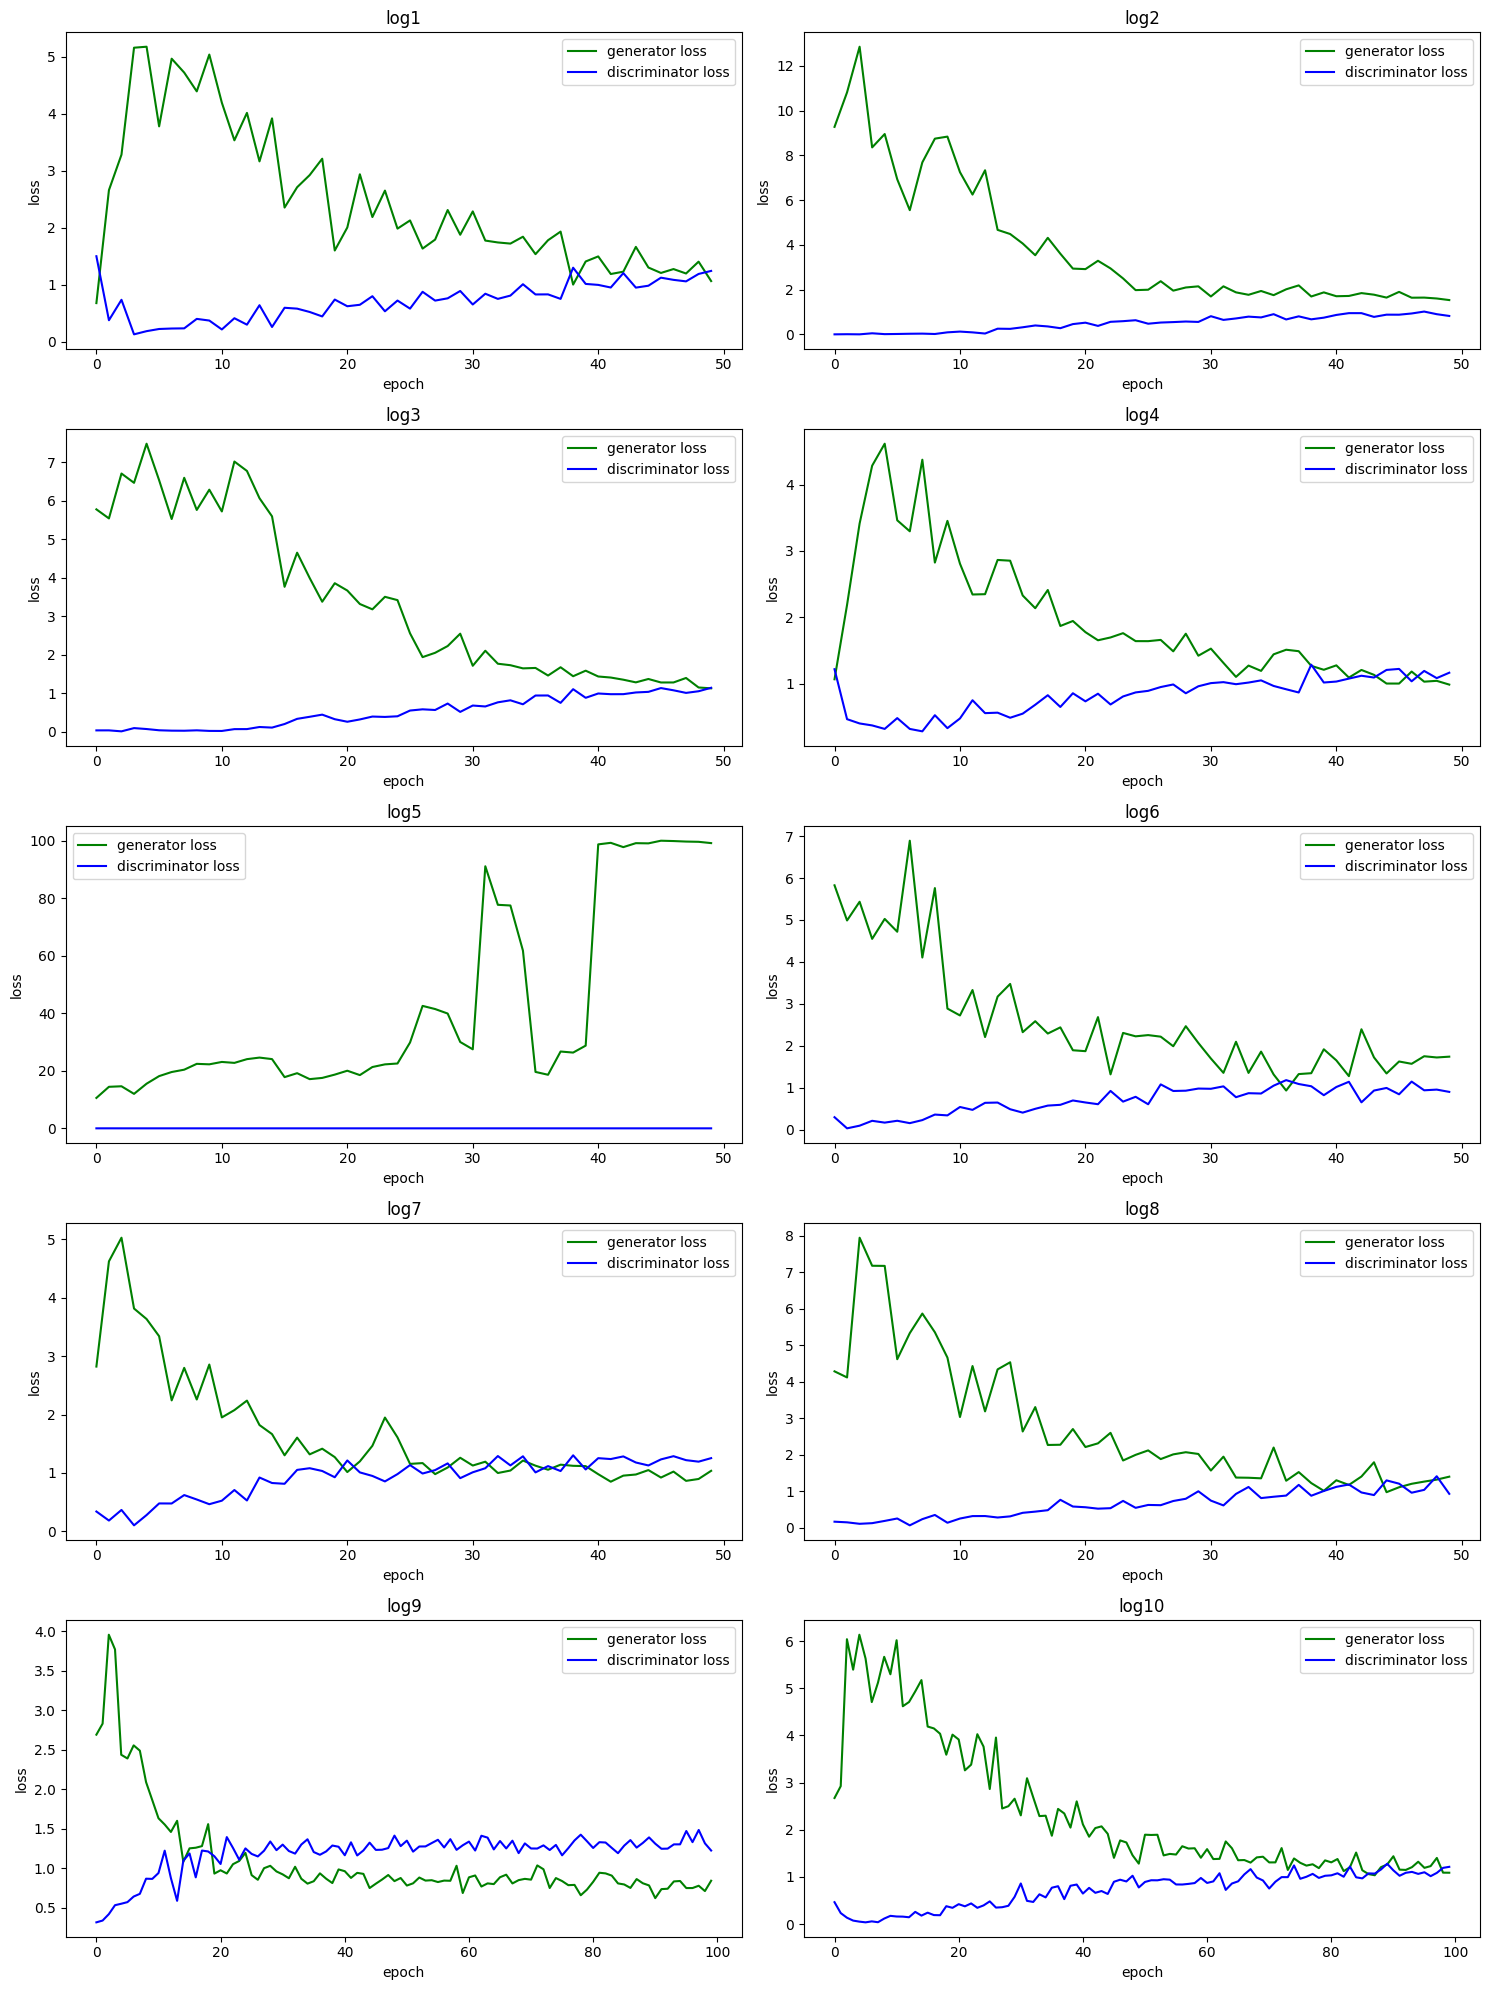

In [ ]:
logPath = '/content/gdrive/MyDrive/Colab Notebooks/GAN'
i = 0

fig,ax = plt.subplots(nrows = 5, ncols = 2, figsize = (15,20))

for dir in os.listdir(logPath):
    fullPath = os.path.join(logPath,dir)
    if os.path.isdir(fullPath):
        df['model'].iloc[i] = dir
        
        logDF = pd.read_csv(os.path.join(fullPath,'trainingLog.csv'))
        df['final D loss'].iloc[i] = logDF.discriminatorLoss.iloc[-1]
        df['final G loss'].iloc[i] = logDF.generatorLoss.iloc[-1]
        df['average epoch time'].iloc[i] = logDF.time.mean()

        with open(os.path.join(fullPath, 'hyperparameters.txt')) as hfile:
            params = json.load(hfile)
        
        for param, val in params.items():
            df[param].iloc[i] = val
        
        df['FID'].iloc[i] = FIDs[dir]


        axi = ax[i//2][i%2]
        axi.plot(logDF.epoch, logDF.generatorLoss, color = 'g', label = 'generator loss')
        axi.plot(logDF.epoch, logDF.discriminatorLoss, color = 'b', label = 'discriminator loss')
        axi.set(title = dir,
               xlabel = 'epoch',
               ylabel = 'loss')
        axi.legend()
        
        i += 1


plt.tight_layout()
            

In [ ]:
print(df[['batch size',
          'generator learning rate',
          'discriminator learning rate',
          'number of epochs',
          'dropout rate',
          'leaky RELU negative slope',
          'wasserstein nCritic',
          'average epoch time',
          'FID']].to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  batch size &  generator learning rate &  discriminator learning rate &  number of epochs &  dropout rate &  leaky RELU negative slope &  wasserstein nCritic &  average epoch time &       FID \\
\midrule
0 &       100.0 &                  0.00010 &                      0.00010 &              50.0 &           0.3 &                      0.200 &                  1.0 &           20.162177 &    2.6929 \\
1 &       100.0 &                  0.00010 &                      0.00010 &              50.0 &           0.3 &                      0.200 &                  5.0 &           33.715941 &    1.2710 \\
2 &       100.0 &                  0.00010 &                      0.00010 &              50.0 &           0.3 &                      0.001 &                  1.0 &           19.718167 &    1.7450 \\
3 &       100.0 &                  0.00010 &                      0.00010 &              50.0 &           0.5 &                      0.200 &                 

In [ ]:
df

,model,batch size,generator learning rate,discriminator learning rate,number of epochs,dropout rate,leaky RELU negative slope,wasserstein nCritic,final D loss,final G loss,average epoch time,FID
0,log1,100.0,0.00010,0.00010,50.0,0.3,0.200,1.0,1.243725e+00,1.065664,20.162177,2.6929
1,log2,100.0,0.00010,0.00010,50.0,0.3,0.200,5.0,8.226192e-01,1.532429,33.715941,1.2710
2,log3,100.0,0.00010,0.00010,50.0,0.3,0.001,1.0,1.143622e+00,1.129708,19.718167,1.7450
3,log4,100.0,0.00010,0.00010,50.0,0.5,0.200,1.0,1.165388e+00,0.986250,20.273801,3.6701
4,log5,100.0,0.00100,0.00010,50.0,0.3,0.200,1.0,1.478197e-07,99.169395,19.962824,167.5097
5,log6,100.0,0.00010,0.00100,50.0,0.3,0.200,1.0,9.007584e-01,1.740717,20.487020,1.7497
6,log7,50.0,0.00010,0.00010,50.0,0.3,0.200,1.0,1.253989e+00,1.036901,26.082310,2.0212
7,log8,50.0,0.00005,0.00010,50.0,0.3,0.200,1.0,9.326225e-01,1.402371,25.851769,0.9597
8,log9,32.0,0.00010,0.00010,100.0,0.3,0.200,1.0,1.225268e+00,0.843167,31.891440,0.6166
9,log10,100.0,0.00005,0.00005,100.0,0.3,0.200,1.0,1.213203e+00,1.088217,19.893487,1.4947
